<p align=center> Riddhi Tanna </p>
<p align=center> ID: 201801427 </p>

# Opening the .csv file in Numbers

 When we try opening the 689MB .csv file in Numbers (counterpart of Excel in MacOS), we get a warning that says that Numbers cannot load more than 10,00,000 rows of data. Our data contains 70,09,030 rows of data and hence, performing the KS test on this data is not possible in Numbers (Excel/Calc). 

<img src='numbers-error.png'>

Hence, to analyze such big amounts of data, Python can prove to be a much more useful tool.

# Importing the required libraries

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np
import statistics as s

In [2]:
#reading the csv file using pandas
df = pd.read_csv('/Users/riddhi/Downloads/2008.csv')

The dataset has the following columns:

In [3]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

# Checking for null/NaN values and replacing them with the mean for the AirTime and the Distance features

In [4]:
df['AirTime'].isnull().values.sum()

154699

In [5]:
df['AirTime'].fillna(df['AirTime'].mean(), inplace = True)
df['AirTime'].isnull().values.sum()

0

In [57]:
df['Distance'].fillna(df['AirTime'].mean(), inplace = True)
df['Distance'].isnull().values.sum()
df_dist = pd.DataFrame(df['Distance'])
df_airtime = pd.DataFrame(df['AirTime'])

# Removing outliers from the above features

In [7]:
#Finding the Inter-Quartile Range (IQR)
Q1_dist = np.percentile(df['Distance'],25)
Q3_dist = np.percentile(df['Distance'],75)
IQR_dist = Q3_dist - Q1_dist
low_dist = Q1_dist - 1.5*(IQR_dist)
high_dist = Q3_dist + 1.5*(IQR_dist)
print('The outliers for the Distance feature lie above {} and below {}.'.format(high_dist,low_dist))

The outliers for the Distance feature lie above 1897.5 and below -618.5.


In [8]:
dist_drop_ol = df_dist.drop(df_dist[df_dist.Distance>high_dist].index)
dist_drop_ol = dist_drop_ol.drop(dist_drop_ol[dist_drop_ol.Distance<low_dist].index)
dist_drop_ol.describe()

,Distance
count,6.634301e+06
mean,6.342557e+02
std,4.094930e+02
min,1.100000e+01
25%,3.140000e+02
50%,5.440000e+02
75%,8.720000e+02
max,1.891000e+03


In [9]:
#Finding the Inter-Quartile Range (IQR) for Air Time
Q1_at = np.percentile(df['AirTime'],25)
Q3_at = np.percentile(df['AirTime'],75)
IQR_at = Q3_at - Q1_at
low_at = Q1_at - 1.5*(IQR_at)
high_at = Q3_at + 1.5*(IQR_at)
print('The outliers for the Air Time feature lie above {} and below {}.'.format(high_at,low_at))

The outliers for the Air Time feature lie above 243.5 and below -56.5.


In [38]:
at_drop_ol = df_airtime.drop( df_airtime[df_airtime.AirTime>high_at].index)
at_drop_ol = at_drop_ol.drop( at_drop_ol[at_drop_ol.AirTime<low_at].index)
at_drop_ol.describe()

,AirTime
count,6.643074e+06
mean,9.338750e+01
std,4.924699e+01
min,0.000000e+00
25%,5.500000e+01
50%,8.400000e+01
75%,1.220000e+02
max,2.430000e+02


# Normalizing Distance and Airtime

In [11]:
dist_norm = pd.DataFrame((dist_drop_ol - dist_drop_ol.mean())/np.std(dist_drop_ol))
dist_norm.describe()

,Distance
count,6.634301e+06
mean,-4.215179e-14
std,1.000000e+00
min,-1.522018e+00
25%,-7.820787e-01
50%,-2.204085e-01
75%,5.805821e-01
max,3.069025e+00


We can see in the above cell that the mean is almost zero and the standard deviation is at 1. Hence, we have normalized the Distance feature.

In [12]:
at_norm = pd.DataFrame((at_drop_ol - at_drop_ol.mean())/np.std(at_drop_ol))
at_norm.describe()

,AirTime
count,6.643074e+06
mean,-3.819961e-12
std,1.000000e+00
min,-1.896309e+00
25%,-7.794894e-01
50%,-1.906209e-01
75%,5.809999e-01
max,3.038003e+00


We can see in the above cell that the mean is almost zero and the standard deviation is at 1. Hence, we have normalized the AirTime feature.

In all of the above cells, we removed outliers from the data using the Inter Quartile Range and then normalized the data. Our data is now ready to be used for the KS test.

# Visualizing the data in the two features with a normally distributed and randomly generated dataset

In [47]:
# Mean = 0, SD = 1

x_axis_dist = np.arange(dist_norm['Distance'].min()-2, dist_norm['Distance'].max()+2, 0.001)

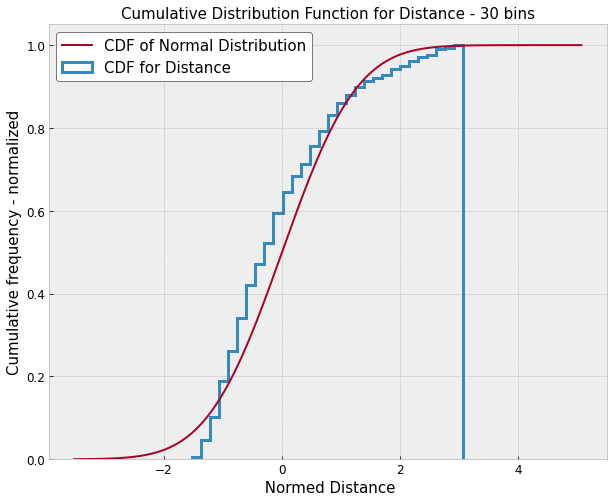

In [64]:
fig, ax = plt.subplots(figsize=[10,8])

#Plotting the histogram - CDF
fig = plt.hist(dist_norm, bins = 30, alpha=1, cumulative=True,histtype='step', lw=3, density=True, label='CDF for Distance')
plt.title('Cumulative Distribution Function for Distance - 30 bins', fontsize=15, color='k')
plt.xlabel(' Normed Distance', fontsize=15, color='k')
plt.ylabel('Cumulative frequency - normalized', fontsize=15, color='k')
plt.xticks(fontsize=12, color='k')
plt.yticks(fontsize=12, color='k')
plt.style.use('bmh')

#Plotting the normal curve
plt.plot(x_axis_dist, scipy.stats.norm.cdf(x_axis_dist,0,1), label='CDF of Normal Distribution')

plt.legend(loc='best',framealpha=1, fontsize=15, facecolor='white', edgecolor='k')
plt.show()

In [40]:
# Mean = 0, SD = 1

x_axis_at = np.arange(at_norm['AirTime'].min()-2, at_norm['AirTime'].max()+2, 0.001)

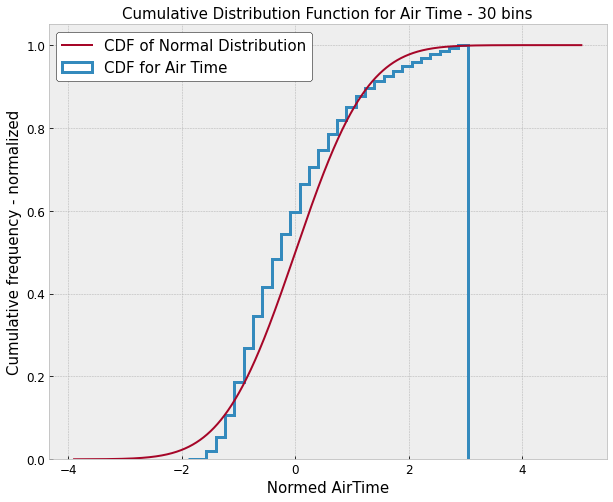

In [62]:
fig, ax = plt.subplots(figsize=[10,8])

#Plotting the histogram - CDF 
fig = plt.hist(at_norm, bins = 30, alpha=1, cumulative=True, histtype='step', lw=3, density=True, label='CDF for Air Time')
plt.title('Cumulative Distribution Function for Air Time - 30 bins', fontsize=15, color='k')
plt.xlabel(' Normed AirTime ', fontsize=15, color='k')
plt.ylabel('Cumulative frequency - normalized', fontsize=15, color='k')
plt.xticks(fontsize=12, color='k')
plt.yticks(fontsize=12, color='k')
plt.style.use('bmh')

#Plotting the normal curve
plt.plot(x_axis_at, scipy.stats.norm.cdf(x_axis_at,0,1), label='CDF of Normal Distribution')

plt.legend(loc='best',framealpha=1, fontsize=15, facecolor='white', edgecolor='k')
plt.show()

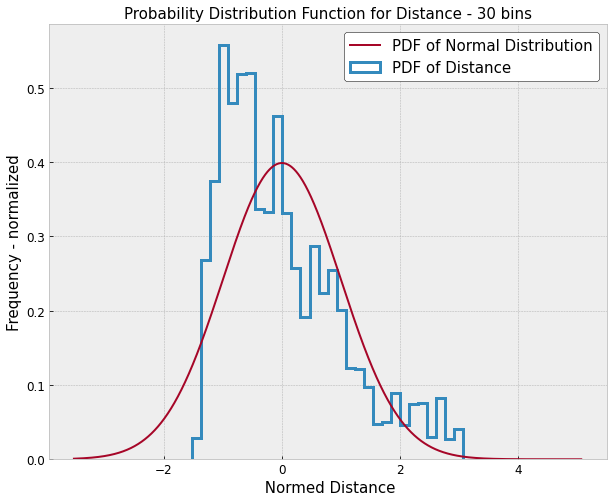

In [65]:
fig, ax = plt.subplots(figsize=[10,8])

#Plotting the histogram - PDF
fig = plt.hist(dist_norm, bins = 30, alpha=1,histtype='step', lw=3, density=True, label='PDF of Distance')
plt.title('Probability Distribution Function for Distance - 30 bins', fontsize=15, color='k')
plt.xlabel(' Normed Distance', fontsize=15, color='k')
plt.ylabel('Frequency - normalized', fontsize=15, color='k')
plt.xticks(fontsize=12, color='k')
plt.yticks(fontsize=12, color='k')
plt.style.use('bmh')

#Plotting the normal curve
plt.plot(x_axis_dist, scipy.stats.norm.pdf(x_axis_dist,0,1), label='PDF of Normal Distribution')

plt.legend(loc='best',framealpha=1, fontsize=15, facecolor='white', edgecolor='k')
plt.show()

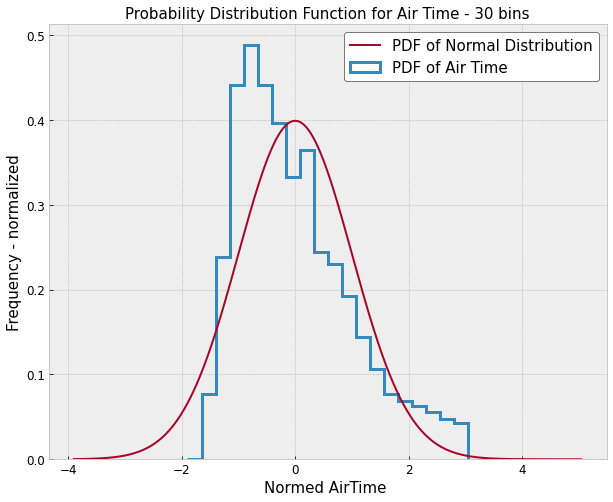

In [66]:
fig, ax = plt.subplots(figsize=[10,8])

#Plotting the histogram - PDF
fig = plt.hist(at_norm, bins = 20, alpha=1, histtype='step', lw=3, density=True, label='PDF of Air Time')
plt.title('Probability Distribution Function for Air Time - 30 bins', fontsize=15, color='k')
plt.xlabel('Normed AirTime ', fontsize=15, color='k')
plt.ylabel('Frequency - normalized', fontsize=15, color='k')
plt.xticks(fontsize=12, color='k')
plt.yticks(fontsize=12, color='k')
plt.style.use('bmh')

#Plotting the normal curve
plt.plot(x_axis_at, scipy.stats.norm.pdf(x_axis_at,0,1), label='PDF of Normal Distribution')

plt.legend(loc='upper right',framealpha=1, fontsize=15, facecolor='white', edgecolor='k')
plt.show()

From the above visualizations, we can infer to some extent that the given data may not be normally distributed since it seems to be deviating from the normal pdf and cdf. However, to be more sure of this, we can perform KS test on our data to determine whether or not our data is normally distributed.

# Performing the KS test

We want to test whether the data in the Distance and AirTime features follows a normal distribution or not. 


The null hypothesis, **H0: the data follows a normal distribution** 

The alternative hypothesis, **Ha: the data does not follow a normal distribution.**

We will reject the null hypothesis if the observed statistic is larger than the critical value.

Let us initially consider the **significance level to be at 0.05**. Hence, we will be able to say with 95% confidence that we either accept or reject the null hypothesis. We are using the *kstest* function available in the *scipy.stats* library. It returns the observed D statistic value (which is the maximum of the distance vector between the two samples we are comparing) and the p-value for the test. In the cells below, we perform the test for both the features and interpret the values we get.

In [58]:
D_at, p_at = scipy.stats.kstest(at_norm['AirTime'], 'norm')
D_dist, p_dist = scipy.stats.kstest(dist_norm['Distance'], 'norm')

In [59]:
print('The observed D statistic value for Distance feature is {}.'.format(D_dist))
print('The observed D statistic value for AirTime feature is {}.'.format(D_at))

The observed D statistic value for Distance feature is 0.09671206250203346.
The observed D statistic value for AirTime feature is 0.08514637205856107.


The table that we refer to for getting the critical values at different levels of significance for N>35: https://blogs.sas.com/content/iml/2019/05/20/critical-values-kolmogorov-test.html#:~:text=What%20is%20a%20%22critical%20value,a%20one%2Dtailed%20test

<img src="critical-values-d.png">

In our case, **N = 6643074** and hence, here are the critical values for the different values of alpha that we would get using the table above:

alpha = 0.01: **0.000632**

alpha = 0.05: **0.000527**

alpha = 0.1: **0.000473**

alpha = 0.15: **0.000442**

alpha = 0.2: **0.000415**

# Inference and conclusion

We know that the significance levels determine how confidently we can accept or reject a null hypothesis. 
We observe that in our case, no matter which significance level we take, we will reject the null hypothesis since our observed statistic, D is more than the critical value of D in all cases. Hence, we can conclude that **both of these features do not follow a normal distribution**. 